In [ ]:
import os
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

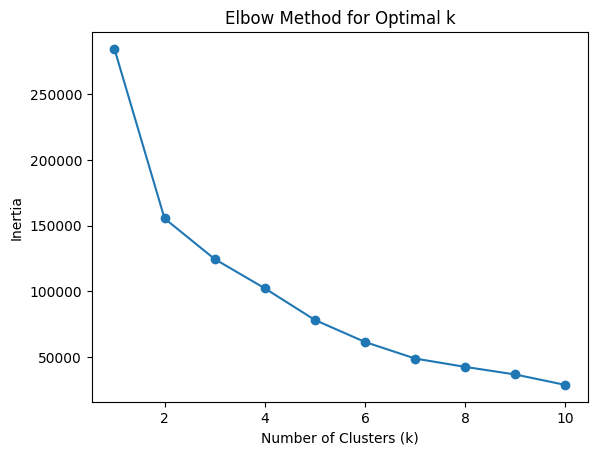

In [ ]:
# prompt: use o metodo Elbow para determinar o valor ideal de k e mostre um gráfico do numero de clusters pelos] valores de k

# Load the data
df = pd.read_parquet("/content/data/games_cleaned.parquet")

# Select relevant numerical features for clustering
# Replace 'feature1', 'feature2', etc. with the actual column names
features = ['Positive', 'Negative', 'Price', 'Recommendations']
X = df[features]

# Handle missing values (if any) - you might need to adjust this based on your data
X = X.fillna(0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
# This is just an example, you might want to explore different methods and values of k.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

O gráfico acima é uma representação do método do cotovelo para encontrar o valor ideal de clusters

In [ ]:
# prompt: usando o kmeans crie um código de clusterização para o arquivo "/content/data/games_cleaned.parquet"

# Choose the optimal k based on your analysis of the inertia values (e.g., elbow point)
k = 3  # Example value - replace with your determined optimal k

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
# You can now analyze the characteristics of each cluster based on the features.
# For instance, calculate the mean of each feature within each cluster.
for i in range(k):
    print(f"Cluster {i+1}:")
    print(df[df['cluster'] == i][features].mean())

Cluster 1:
Positive           7049.698630
Negative            968.357963
Price                28.487729
Recommendations    5863.367511
dtype: float64
Cluster 2:
Positive           295.053674
Negative            59.107848
Price                4.823096
Recommendations    175.769416
dtype: float64
Cluster 3:
Positive           3459537.5
Negative            831327.5
Price                    0.0
Recommendations    2529007.0
dtype: float64


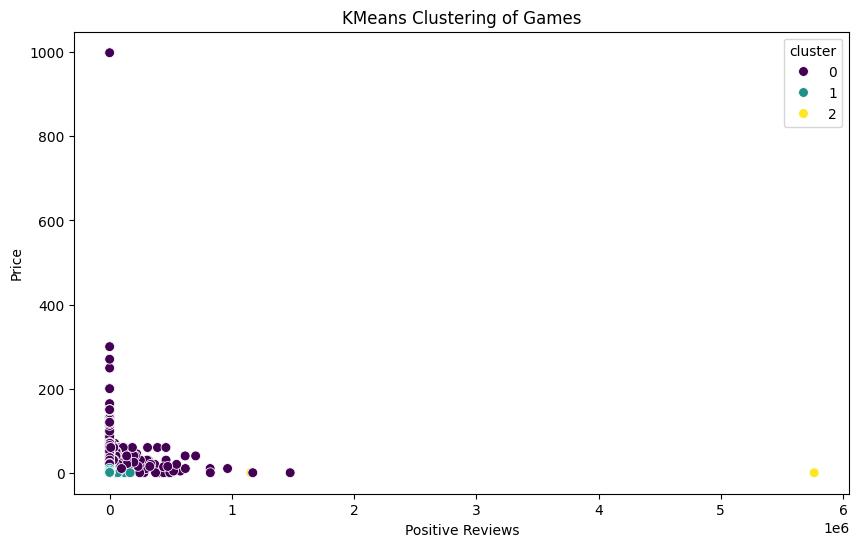

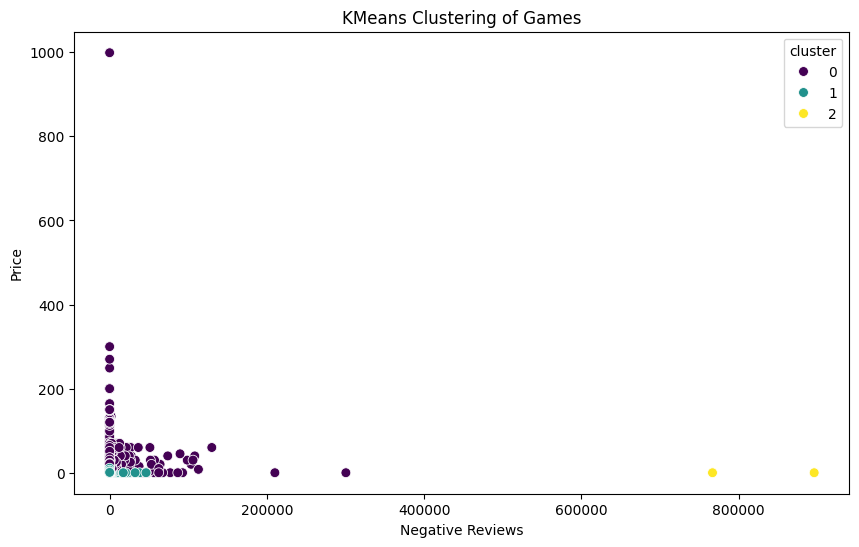

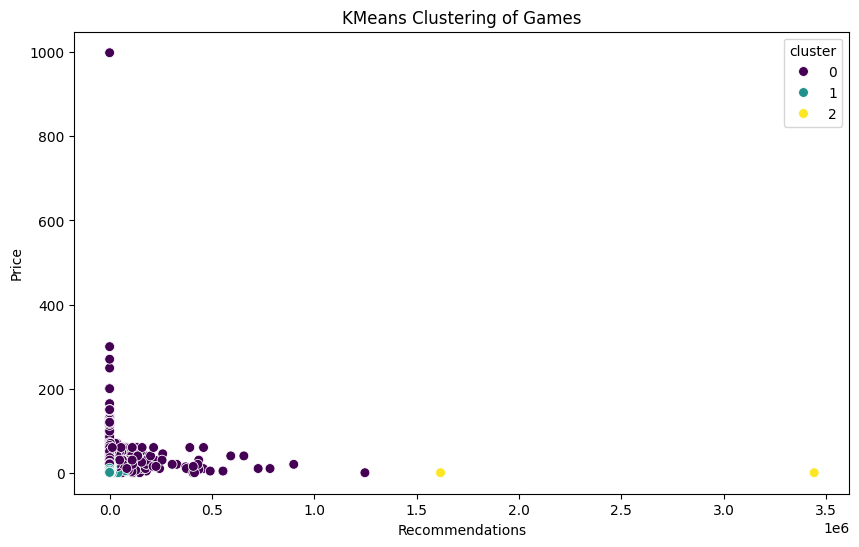

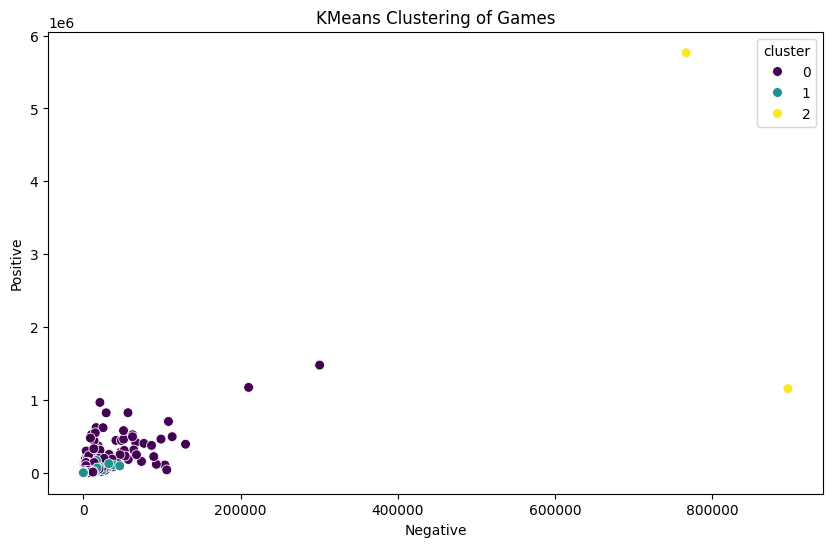

In [ ]:
# prompt: gere um gráfico para representar esses clusters

# ... (your existing code) ...

# Perform KMeans clustering (assuming you've already done this)
# ...

# Visualize the clusters using a scatter plot (example with two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Positive', y='Price', hue='cluster', data=df, palette='viridis', s=50)
plt.title('KMeans Clustering of Games')
plt.xlabel('Positive Reviews')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Negative', y='Price', hue='cluster', data=df, palette='viridis', s=50)
plt.title('KMeans Clustering of Games')
plt.xlabel('Negative Reviews')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recommendations', y='Price', hue='cluster', data=df, palette='viridis', s=50)
plt.title('KMeans Clustering of Games')
plt.xlabel('Recommendations')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Negative', y='Positive', hue='cluster', data=df, palette='viridis', s=50)
plt.title('KMeans Clustering of Games')
plt.xlabel('Negative')
plt.ylabel('Positive')
plt.show()


Os gráficos acima mostram a distribuição dos clusters de acordo com